In [1]:
'''
SANS Presentation
Addressing the alert fatigue with Supervised ML

With the large number of alerts being generated daily by security tools, 
we need a way to reduce that noise. This noteboo/livestream is showing
one method to address these alerts. Particularly from the IBM QRadar SIEM
Associated Video: https://www.youtube.com/watch?v=XdKbyhUst_s
'''

'\nSANS Presentation\nAddressing the alert fatigue with Supervised ML\n\nWith the large number of alerts being generated daily by security tools, \nwe need a way to reduce that noise. This noteboo/livestream is showing\none method to address these alerts. Particularly from the IBM QRadar SIEM\n \nAssociated Video: https://www.youtube.com/watch?v=XdKbyhUst_s\n\n'

In [2]:
# Import the initial libraries
import pandas as pd
import numpy as np

In [3]:
# Gain access to the data and perform an initial read
pd.read_csv(r'D:\ML\SecurityIncidents.csv', header=0, sep=',', encoding_errors='ignore').head(5)

,Description,Details,Status
0,SEVERITY-3: DE000: AWS Cloud: Password Policy ...,AlertID: 44459\nAlert start time: 2021-04-15 0...,True Positive - Benign
1,SEVERITY-3: E0000: Detected Excessive Executio...,AlertID: 41400\nAlert start time: 2021-03-28 1...,True Positive - Benign
2,SEVERITY-3: CC000: Excessive Outbound Connecti...,Alert ID: 43646\nAlert Description: SEVERITY-3...,True Positive - Benign
3,SEVERITY-3: High Number of Blocked Events from...,AlertID: 34089\nAlert start time: 2020-11-02 1...,False Positive
4,SEVERITY-3: IA006: Multiple Login Failures for...,AlertID: 37923\nAlert start time: 2021-03-05 0...,True Positive - Benign


In [4]:
# Acquire the data
df_security_incidents = pd.read_csv(r'D:\ML\SecurityIncidents.csv', header=0, sep=',', encoding_errors='ignore')

# Begin Exploratory data analysis (EDA)
df_security_incidents.head(5)

,Description,Details,Status
0,SEVERITY-3: DE000: AWS Cloud: Password Policy ...,AlertID: 44459\nAlert start time: 2021-04-15 0...,True Positive - Benign
1,SEVERITY-3: E0000: Detected Excessive Executio...,AlertID: 41400\nAlert start time: 2021-03-28 1...,True Positive - Benign
2,SEVERITY-3: CC000: Excessive Outbound Connecti...,Alert ID: 43646\nAlert Description: SEVERITY-3...,True Positive - Benign
3,SEVERITY-3: High Number of Blocked Events from...,AlertID: 34089\nAlert start time: 2020-11-02 1...,False Positive
4,SEVERITY-3: IA006: Multiple Login Failures for...,AlertID: 37923\nAlert start time: 2021-03-05 0...,True Positive - Benign


In [5]:
# Grab some info on the table
df_security_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27001 entries, 0 to 27000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  27001 non-null  object
 1   Details      27001 non-null  object
 2   Status       27001 non-null  object
dtypes: object(3)
memory usage: 633.0+ KB


In [6]:
# look at the first record short description
df_security_incidents['Description'][0]

'SEVERITY-3: DE000: AWS Cloud: Password Policy Updated - securitynik - Alert Index: Username:  Dome9CloudBots'

In [7]:
# look at the first record description
df_security_incidents.Details[0]

"AlertID: 44459\nAlert start time: 2021-04-15 07:01:26\nAlert Description:SEVERITY-3: DE000: AWS Cloud: Password Policy Updated - securitynik\nAlert Criticality: Medium\nMultiple Category: ['Suspicious Activity', 'Policy Change']\nFirst Event Timestamp: 2021-04-15 07:01:26\nLast Event Timestamp:2021-04-15 07:02:59\nAlert Type: Alert\nAlert Index: Username\nSource IP: IP  is not valid\nDestination IP: IP  is not valid\nMagnitude: 2"

In [8]:
# Get the unique values for the labels
# These are the targets and what we would like to predict
df_security_incidents['Status'].value_counts()

False Positive               22848
True Positive - Benign        3802
True Positive - Malicious      351
Name: Status, dtype: int64

In [9]:
# Plot a bar graph of the various status for a better view
# Some folks are more visual and thus prefer pretty graphs
from matplotlib import pyplot as plt

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

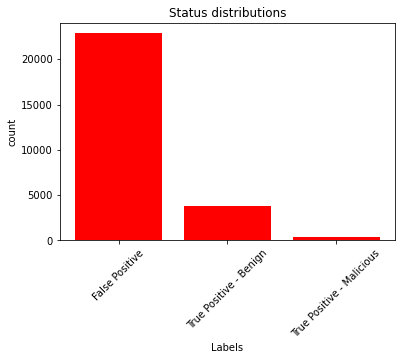

In [10]:
# Get statistics on the number of records
plt.title('Status distributions')
plt.bar(x=sorted(df_security_incidents.Status.unique()), height=df_security_incidents['Status'].value_counts(), color='red', align='center')
plt.xlabel('Labels')
plt.ylabel('count')
plt.xticks(rotation=45)

In [11]:
# First up, let's combine the description and 
# Grab some info on the table
df_security_incidents['Data'] = df_security_incidents.Description + ' ' + df_security_incidents.Details
df_security_incidents.head(5)

,Description,Details,Status,Data
0,SEVERITY-3: DE000: AWS Cloud: Password Policy ...,AlertID: 44459\nAlert start time: 2021-04-15 0...,True Positive - Benign,SEVERITY-3: DE000: AWS Cloud: Password Policy ...
1,SEVERITY-3: E0000: Detected Excessive Executio...,AlertID: 41400\nAlert start time: 2021-03-28 1...,True Positive - Benign,SEVERITY-3: E0000: Detected Excessive Executio...
2,SEVERITY-3: CC000: Excessive Outbound Connecti...,Alert ID: 43646\nAlert Description: SEVERITY-3...,True Positive - Benign,SEVERITY-3: CC000: Excessive Outbound Connecti...
3,SEVERITY-3: High Number of Blocked Events from...,AlertID: 34089\nAlert start time: 2020-11-02 1...,False Positive,SEVERITY-3: High Number of Blocked Events from...
4,SEVERITY-3: IA006: Multiple Login Failures for...,AlertID: 37923\nAlert start time: 2021-03-05 0...,True Positive - Benign,SEVERITY-3: IA006: Multiple Login Failures for...


In [12]:
df_security_incidents['y_labels'] = df_security_incidents['Status'].map(dict({'False Positive':0, 'True Positive - Benign':1, 'True Positive - Malicious':1}))
df_security_incidents.head(5)

,Description,Details,Status,Data,y_labels
0,SEVERITY-3: DE000: AWS Cloud: Password Policy ...,AlertID: 44459\nAlert start time: 2021-04-15 0...,True Positive - Benign,SEVERITY-3: DE000: AWS Cloud: Password Policy ...,1
1,SEVERITY-3: E0000: Detected Excessive Executio...,AlertID: 41400\nAlert start time: 2021-03-28 1...,True Positive - Benign,SEVERITY-3: E0000: Detected Excessive Executio...,1
2,SEVERITY-3: CC000: Excessive Outbound Connecti...,Alert ID: 43646\nAlert Description: SEVERITY-3...,True Positive - Benign,SEVERITY-3: CC000: Excessive Outbound Connecti...,1
3,SEVERITY-3: High Number of Blocked Events from...,AlertID: 34089\nAlert start time: 2020-11-02 1...,False Positive,SEVERITY-3: High Number of Blocked Events from...,0
4,SEVERITY-3: IA006: Multiple Login Failures for...,AlertID: 37923\nAlert start time: 2021-03-05 0...,True Positive - Benign,SEVERITY-3: IA006: Multiple Login Failures for...,1


<AxesSubplot:>

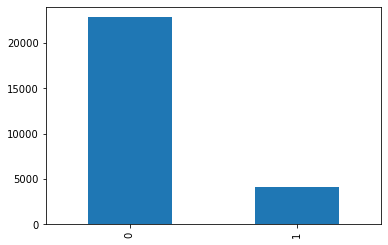

In [13]:
# Plot a bar graph of the two classes
# This time, take advantage of pandas bar plot
df_security_incidents.y_labels.value_counts().plot.bar()

In [14]:
# Identifying how skewed the data set is
df_security_incidents.shape


(27001, 5)

In [15]:
# Revisit the distribution of the new labels
df_security_incidents['y_labels'].value_counts()

0    22848
1     4153
Name: y_labels, dtype: int64

In [16]:
# Confirm the percentage of records in the y labels 
# That are 1
round( df_security_incidents['y_labels'].value_counts()[1] / df_security_incidents.shape[0], 2 ) * 100


15.0

In [17]:
# Let the dataset only focus on Data and status y_labels fields
df_security_incidents.drop(columns=['Description', 'Details', 'Status'], inplace=True)
df_security_incidents.head(5)

,Data,y_labels
0,SEVERITY-3: DE000: AWS Cloud: Password Policy ...,1
1,SEVERITY-3: E0000: Detected Excessive Executio...,1
2,SEVERITY-3: CC000: Excessive Outbound Connecti...,1
3,SEVERITY-3: High Number of Blocked Events from...,0
4,SEVERITY-3: IA006: Multiple Login Failures for...,1


In [18]:
# Go ahead and split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [19]:
# Split the data into 70% training and 30% test while stratifying
X_train, X_test, y_train, y_test = train_test_split(df_security_incidents['Data'], df_security_incidents['y_labels'], random_state=10, test_size=.30, train_size=.70, stratify=df_security_incidents['y_labels'])

# Get the shape of the splitted data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18900,), (18900,), (8101,), (8101,))

In [20]:
# Show that we cannot build the model as the input is all text
# Machine learning algorithm need numbers
X_train[0]

"SEVERITY-3: DE000: AWS Cloud: Password Policy Updated - securitynik - Alert Index: Username:  Dome9CloudBots AlertID: 44459\nAlert start time: 2021-04-15 07:01:26\nAlert Description:SEVERITY-3: DE000: AWS Cloud: Password Policy Updated - securitynik\nAlert Criticality: Medium\nMultiple Category: ['Suspicious Activity', 'Policy Change']\nFirst Event Timestamp: 2021-04-15 07:01:26\nLast Event Timestamp:2021-04-15 07:02:59\nAlert Type: Alert\nAlert Index: Username\nSource IP: IP  is not valid\nDestination IP: IP  is not valid\nMagnitude: 2"

In [21]:
# Import NLTK tookkit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SecurityNik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Setup a word cloud for X_Train
from wordcloud import WordCloud

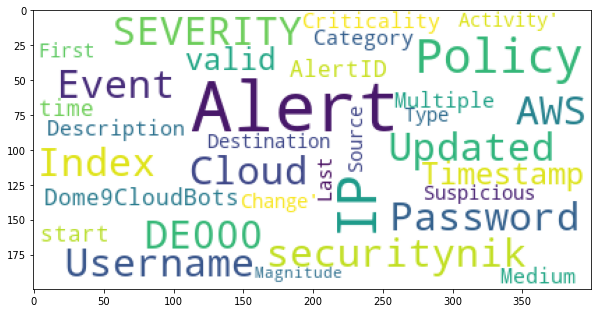

In [23]:
my_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(X_train[0])
plt.figure(figsize=(10,10))
plt.imshow(my_wordcloud)

In [24]:
# Extract all individual words as a list
all_words = X_train.str.split().values.tolist()
all_words[0:1]

[['SEVERITY-3client1106:',
  'Detected',
  'Excessive',
  'Execution',
  'of',
  'SC',
  'Command',
  '-',
  'Alert',
  'Index:',
  'Source',
  'IP:',
  '10.10.99.220',
  'Alert',
  'ID:',
  '25337',
  'Alert',
  'Description:',
  'SEVERITY-3client1106:',
  'Detected',
  'Excessive',
  'Execution',
  'of',
  'SC',
  'Command',
  'containing',
  'Process',
  'Create',
  'Alert',
  'Type:',
  'Source',
  'IP',
  '#',
  'of',
  'Alerts:',
  '1',
  'Source',
  'IP:',
  '10.10.99.220',
  'Destination',
  'IP:',
  '10.10.99.220',
  'User:',
  'A0M812',
  'Hostname:',
  'client122875.ad.client1.local',
  'Location:',
  'Wireless_Networks.Prod_MB_Wireless',
  'Log',
  'Source(s)',
  'reporting',
  'on',
  'this',
  'Alert:',
  'WindowsAuthServer',
  '@',
  'client122875.ad.client1.local,',
  'Custom',
  'Rule',
  'Engine-103',
  '::',
  'client1-siem20',
  'Low',
  'level',
  'category:',
  'Misc',
  'Malware,',
  'Process',
  'Creation',
  'Success',
  'IP',
  'Threat',
  'Intelligence:',
  '

In [25]:
# Flatten the list of list
flatten_words = [ new_word for word in all_words for new_word in word ]
flatten_words[:10]

['SEVERITY-3client1106:',
 'Detected',
 'Excessive',
 'Execution',
 'of',
 'SC',
 'Command',
 '-',
 'Alert',
 'Index:']

In [26]:
# Import collections
from collections import Counter

In [27]:
# Setup the word counter
word_counter = Counter(flatten_words)

# Get the most common words
most_common_words = word_counter.most_common()

# print the top 10 common words
most_common_words[:10]

[('Alert', 117632),
 ('IP:', 49076),
 ('Source', 41126),
 ('Event', 36846),
 ('-', 31724),
 ('Timestamp:', 28434),
 ('Index:', 28382),
 ('IP', 24310),
 ('Destination', 22790),
 ('Multiple', 20383)]

In [28]:
# Setup two dictionaries to get the top words and their counts
x_words, y_counts = [], []

# Now add the values above to the two list
# In the interest of time, use the first 50
for word, count in most_common_words[:25]:
    x_words.append(word)
    y_counts.append(count)

In [29]:
# Import seaborn for easier graphs
import seaborn as sns

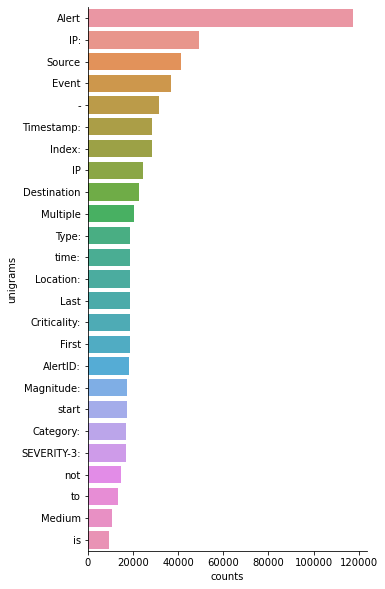

In [30]:
# Plot a bar graph of the unigrams
plt.figure(figsize=(5, 10))
plt.xlabel('counts')
plt.ylabel('unigrams')
sns.barplot(x=y_counts, y=x_words)
sns.despine()

In [31]:
# Create a function to clean the data
my_stop_words = ['alert', 'event', 'criticality', 'description', 'timestamp', 'start', 'time', 'first', 'last']

regex_tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
pstemmer = nltk.PorterStemmer()

def clean_data(data):
    print(f'[+] Cleaning ...')
    cleaned_data = data.str.lower()
    cleaned_data = cleaned_data.str.replace('\n', ' ').str.replace('\t', ' ').str.replace(']',' ').str.replace('[',' ').str.replace(':', ' ')
    cleaned_data = cleaned_data.str.replace(r'\s\d+\-\d+\-\d+.*?\s+alert', ' ', regex=True)
    
    # Tokenize the sentences
    cleaned_data = cleaned_data.apply(nltk.tokenize.word_tokenize)

    # apply stop words
    cleaned_data = cleaned_data.apply(lambda x: ' '.join([ word for word in x if word not in my_stop_words]))

    # lametize the data
    cleaned_data = cleaned_data.apply(lambda x: [ pstemmer.stem(word, to_lowercase=True) for word in regex_tokenizer.tokenize(x)])

    print(f'[+] Done Cleaning ...')
    return cleaned_data



In [32]:
# call the function to clean the train data
X_train = clean_data(X_train)

[+] Cleaning ...


C:\Users\SECURI~1\AppData\Local\Temp/ipykernel_6424/2257533938.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cleaned_data = cleaned_data.str.replace('\n', ' ').str.replace('\t', ' ').str.replace(']',' ').str.replace('[',' ').str.replace(':', ' ')


[+] Done Cleaning ...


In [33]:
type(X_train)

pandas.core.series.Series

In [34]:
X_train[0]

['severity-3',
 'de000',
 'aw',
 'cloud',
 'password',
 'polici',
 'updat',
 '-',
 'securitynik',
 '-',
 'index',
 'usernam',
 'dome9cloudbot',
 'alertid',
 '44459',
 'severity-3',
 'de000',
 'aw',
 'cloud',
 'password',
 'polici',
 'updat',
 '-',
 'securitynik',
 'medium',
 'multipl',
 'categori',
 "'suspici",
 'activ',
 "'",
 ',',
 "'polici",
 'chang',
 "'",
 'type',
 'index',
 'usernam',
 'sourc',
 'ip',
 'ip',
 'is',
 'not',
 'valid',
 'destin',
 'ip',
 'ip',
 'is',
 'not',
 'valid',
 'magnitud',
 '2']

In [35]:
# import TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix, classification_report


In [36]:
# What is this TFIDF?
corpus = ['SANS Rock', 'SANS Rock Paper', 'SANS Rock Paper Scissor']
tfidf_vect = TfidfVectorizer()
vectorized_corpus = tfidf_vect.fit_transform(corpus)
pd.DataFrame(vectorized_corpus.toarray(), columns=tfidf_vect.get_feature_names())


,paper,rock,sans,scissor
0,0.000000,0.707107,0.707107,0.00000
1,0.673255,0.522842,0.522842,0.00000
2,0.504107,0.391484,0.391484,0.66284


In [37]:
# Setup a list to store the models
models = []

In [38]:
# Prepare the pipelines
nb_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('nb_clf', ComplementNB()),
            ])

lr_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('lr_clf', LogisticRegression()),
            ])

ada_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('ada_clf', ComplementNB()),
            ])

In [39]:
# Append the pipelines to the model list
models.append(nb_pipeline)
models.append(lr_pipeline)
models.append(ada_pipeline)

# Print out the model list
models

[Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb_clf', ComplementNB())]),
 Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr_clf', LogisticRegression())]),
 Pipeline(steps=[('tfidf', TfidfVectorizer()), ('ada_clf', ComplementNB())])]

In [40]:
# Don't really need this. However, this is to confirm both the data has the same shape
len(pd.DataFrame(X_train.values.tolist())), len(y_train)

(18900, 18900)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb_clf', ComplementNB())]) accuracy is: 0.8591531909640785
Confusion matrix for Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb_clf', ComplementNB())]): 
Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb_clf', ComplementNB())]) accuracy is: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6855
           1       0.82      0.11      0.19      1246

    accuracy                           0.86      8101
   macro avg       0.84      0.55      0.56      8101
weighted avg       0.85      0.86      0.81      8101

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr_clf', LogisticRegression())]) accuracy is: 0.8885322799654364
Confusion matrix for Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr_clf', LogisticRegression())]): 
Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr_clf', LogisticRegression())]) accuracy is: 
              precision    recall  f1-score   support

           0

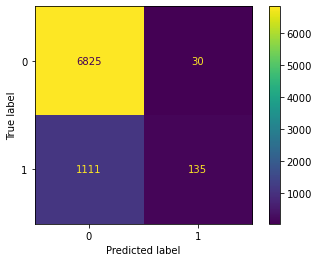

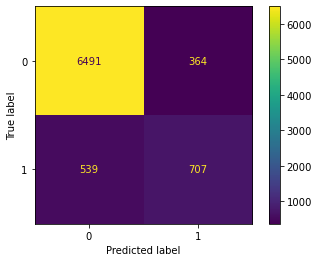

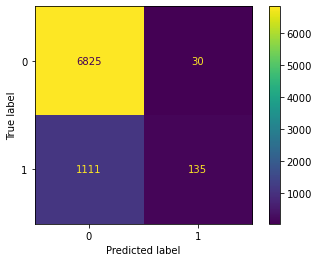

In [41]:
for model in models:
    model.fit(X_train.astype('str'), y_train)

    # print model accuracy first
    print(f'{model} accuracy is: {model.score(X_test, y_test)}')

    # print confusion matrix
    print(f'Confusion matrix for {model}: \n {plot_confusion_matrix(model, X_test, y_test)}')

    # print classification report
    print(f'{model} accuracy is: \n{classification_report(y_test, model.predict(X_test))}')

In [42]:
# Now that we know the Logistic Regression Model is the best, let's make a prediction
lr_pipeline.predict(X_test.astype('str'))[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
# compare this to what we know as the truth
y_test[:10]

10904    0
19763    0
8526     0
365      0
8773     0
23717    0
21271    1
20453    0
2444     1
876      0
Name: y_labels, dtype: int64

In [44]:
lr_parameters = {
    'tfidf__ngram_range' : [(1,1), (1,2)],
    'tfidf__max_df' : (0.25, 0.5, 0.75),
    'tfidf__max_features' : [300, 500, 1000, None],
    
    'lr_clf__penalty' : ['l1', 'l2', None], 
    'lr_clf__solver' : ['sag', 'liblinear', 'lbfgs'],
    'lr_clf__class_weight' : [{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}]
}

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Setup the RandomizedSearchCV
lr_random_cv = RandomizedSearchCV(estimator=lr_pipeline, param_distributions=lr_parameters, scoring='recall', n_iter=10, cv=5, random_state=10, n_jobs=-1, verbose=1)
lr_random_cv.fit(X_train.astype('str'), y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\SecurityNik\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80426862        nan 0.81390185 0.57862436        nan        nan
        nan 0.83523431 0.63434119        nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('lr_clf', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'lr_clf__class_weight': [{0: 1, 1: 1},
                                                                 {0: 1, 1: 2},
                                                                 {0: 1, 1: 3}],
                                        'lr_clf__penalty': ['l1', 'l2', None],
                                        'lr_clf__solver': ['sag', 'liblinear',
                                                           'lbfgs'],
                                        'tfidf__max_df': (0.25, 0.5, 0.75),
                                        'tfidf__max_features': [300, 500, 1000,
                                                                None],
                                        'tfidf__ngram_range': [(1, 1), (1, 2)]},
                

In [47]:
# Getting the best parameters
lr_random_cv.best_params_

{'tfidf__ngram_range': (1, 2),
 'tfidf__max_features': 300,
 'tfidf__max_df': 0.25,
 'lr_clf__solver': 'liblinear',
 'lr_clf__penalty': 'l2',
 'lr_clf__class_weight': {0: 1, 1: 3}}

In [48]:
# Get the best recall score 
lr_random_cv.best_score_

0.8352343098461594

In [49]:
# Access a particular step
lr_pipeline.steps[0]

('tfidf', TfidfVectorizer())

In [50]:
# Alternatively, if you wanted to access that step in a different way
lr_pipeline.named_steps.tfidf, lr_pipeline.named_steps['tfidf'] 

(TfidfVectorizer(), TfidfVectorizer())

In [51]:
# Build the final model with the new hyperparameters
lr_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=300, max_df=0.25)),
                ('lr_clf', LogisticRegression(solver='liblinear', penalty='l2', class_weight={0:1, 1:3}, random_state=10, n_jobs=-1)),
            ])

In [52]:
# Train the model which is now using the new hyperparameters
lr_pipeline.fit(X_train.astype('str'), y_train)

C:\Users\SecurityNik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.25, max_features=300,
                                 ngram_range=(1, 2))),
                ('lr_clf',
                 LogisticRegression(class_weight={0: 1, 1: 3}, n_jobs=-1,
                                    random_state=10, solver='liblinear'))])

              precision    recall  f1-score   support

           0       0.98      0.58      0.73      6855
           1       0.29      0.94      0.44      1246

    accuracy                           0.63      8101
   macro avg       0.63      0.76      0.58      8101
weighted avg       0.87      0.63      0.68      8101



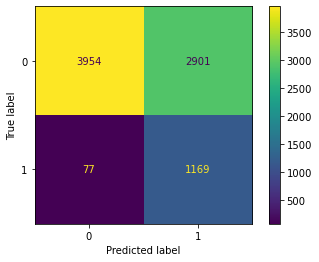

In [53]:
# Get the new score
lr_pipeline.score(X_test, y_test)

# print confusion matrix
plot_confusion_matrix(lr_pipeline, X_test, y_test)

# print classification report
print(f'{classification_report(y_test, lr_pipeline.predict(X_test))}')

In [54]:
# Save the model
import pickle

In [55]:
# Saving the model
pickle.dump(lr_pipeline, (open('sans-model.pkl', 'wb')))

In [56]:
# Import the new models
imported_model = pickle.load(open('sans-model.pkl', 'rb'))

In [57]:
# Make prediction on the new data
imported_model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)